In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML
import pyperclip

from misc_util.logutils import setup_logging
from misc_util.pretty_print import Markdown, display

from derive_conceptualspace.pipeline import SnakeContext, load_envfiles
from derive_conceptualspace.util.result_analysis_tools import getfiles_allconfigs, display_metrics, show_lambda_elements, highlight_nonzero_max, df_to_latex, shorten_met
from derive_conceptualspace.settings import DEFAULT_N_CPUS
from derive_conceptualspace.util.threadworker import WorkerPool
from derive_conceptualspace.cli.args_from_filename import get_filename, print_envvars

plt.rcParams['figure.figsize'] = [16, 10]

## Prepare all parameter-combinations

In [2]:
setup_logging()
load_envfiles("placetypes")
configs, print_cnf = getfiles_allconfigs("featureaxes", verbose=True)

<span style="font-size:11pt">There are 24 different parameter-combis for dataset <span style="color: #0000ff">placetypes</span>:</span>

{'dataset': 'placetypes',
 'language': 'en',
 'debug': 'False',
 'pp_components': 'none',
 'translate_policy': 'onlyorig',
 'min_words_per_desc': '50',
 'quantification_measure': ['ppmi', 'tfidf'],
 'embed_algo': 'mds',
 'embed_dimensions': ['3', '50', '100', '200'],
 'extraction_method': 'all',
 'dcm_quant_measure': ['count', 'ppmi', 'tfidf'],
 'kappa_weights': 'quadratic'}

In [3]:
print_envvars(get_filename(configs[0], get_dependencies=False, doprint=False))

MA_DATASET=placetypes;MA_LANGUAGE=en;MA_DEBUG=False;MA_PP_COMPONENTS=none;MA_TRANSLATE_POLICY=onlyorig;MA_MIN_WORDS_PER_DESC=50;MA_QUANTIFICATION_MEASURE=ppmi;MA_EMBED_ALGO=mds;MA_EMBED_DIMENSIONS=3;MA_EXTRACTION_METHOD=all;MA_DCM_QUANT_MEASURE=count;MA_KAPPA_WEIGHTS=quadratic
featureaxes


derive_conceptualspace/cli/args_from_filename.py:57: UserWarning: Assuming that generated_paths is sorted!


In [4]:
with WorkerPool(DEFAULT_N_CPUS-3, pgbar="Fetching featureaxes..") as pool:
    get_featureaxes = lambda conf: ((ctx := SnakeContext.loader_context(config=conf, silent=True)).get_important_settings(), ctx.load("featureaxes"))
    featureaxes_list, interrupted = pool.work(configs, get_featureaxes)

Fetching featureaxes.. [3 procs]: 100%|██████████| 24/24 [01:17<00:00,  3.25s/it]


# Showing all metrics for the loaded parameter-combinations

## quantification_measure: ppmi, embed_dimensions: 3, dcm_quant_measure: count

<span style="font-size:11pt">Settings: <span style="color: #0000ff">0434bb5242</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #0000ff">count</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">3</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

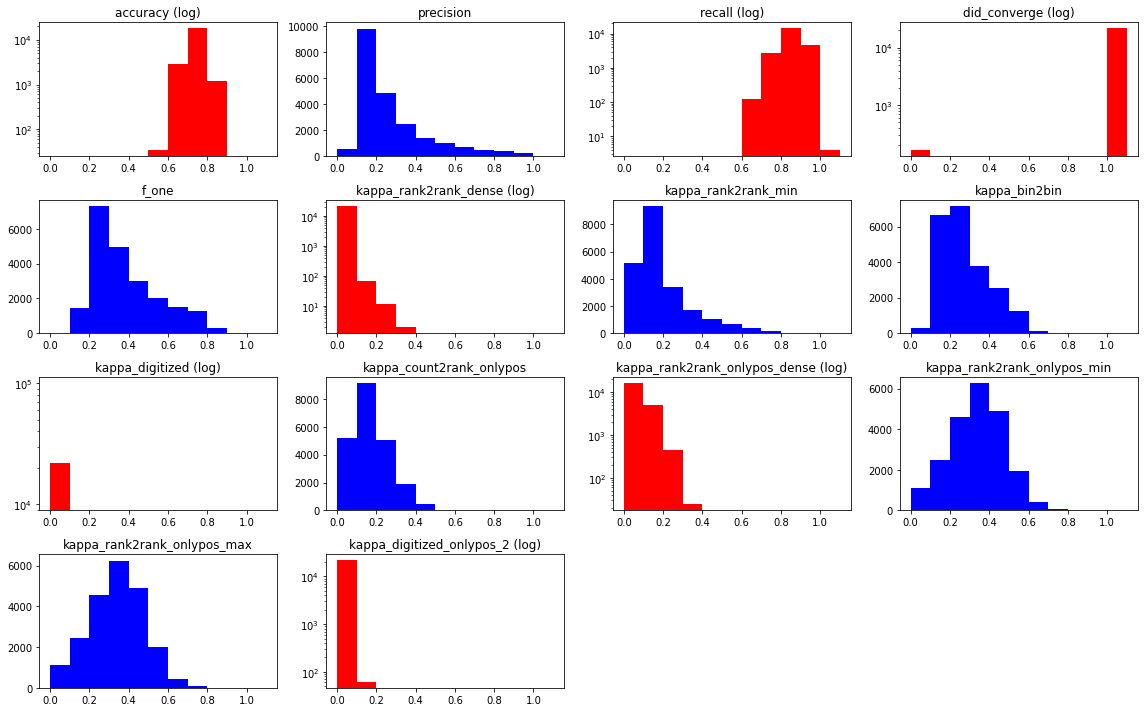

## quantification_measure: ppmi, embed_dimensions: 3, dcm_quant_measure: ppmi

<span style="font-size:11pt">Settings: <span style="color: #00ffff">727aed325d</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">ppmi</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">3</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

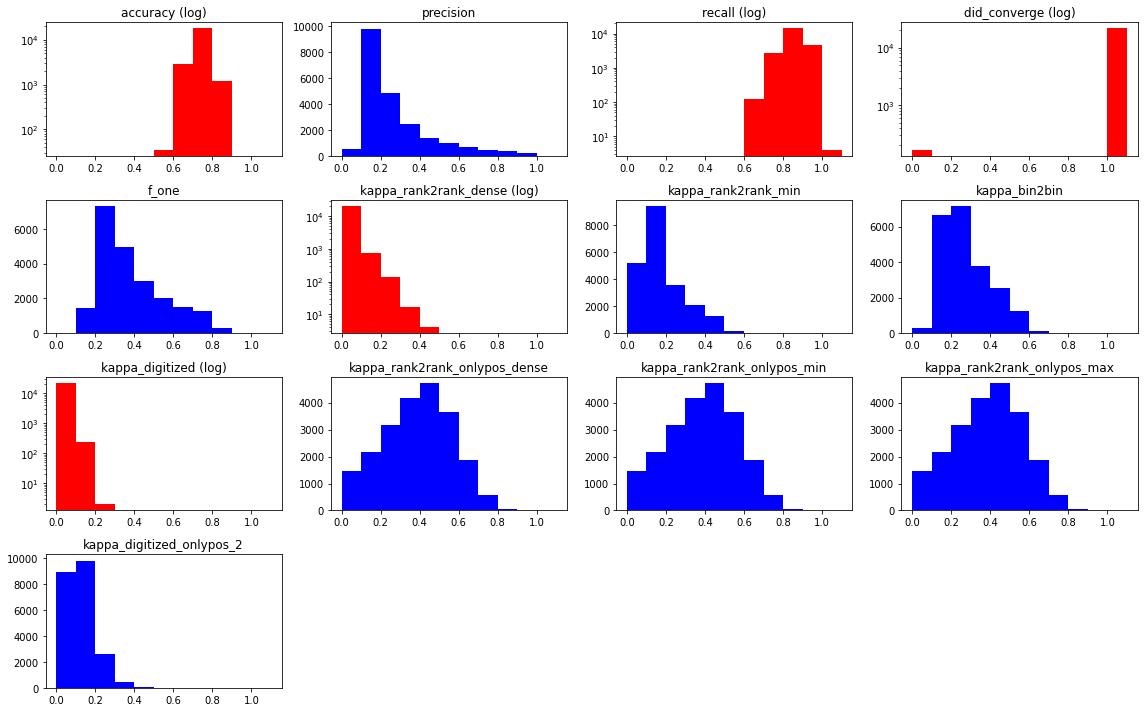

## quantification_measure: ppmi, embed_dimensions: 3, dcm_quant_measure: tfidf

<span style="font-size:11pt">Settings: <span style="color: #ff00ff">45eb6610b4</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">tfidf</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">3</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

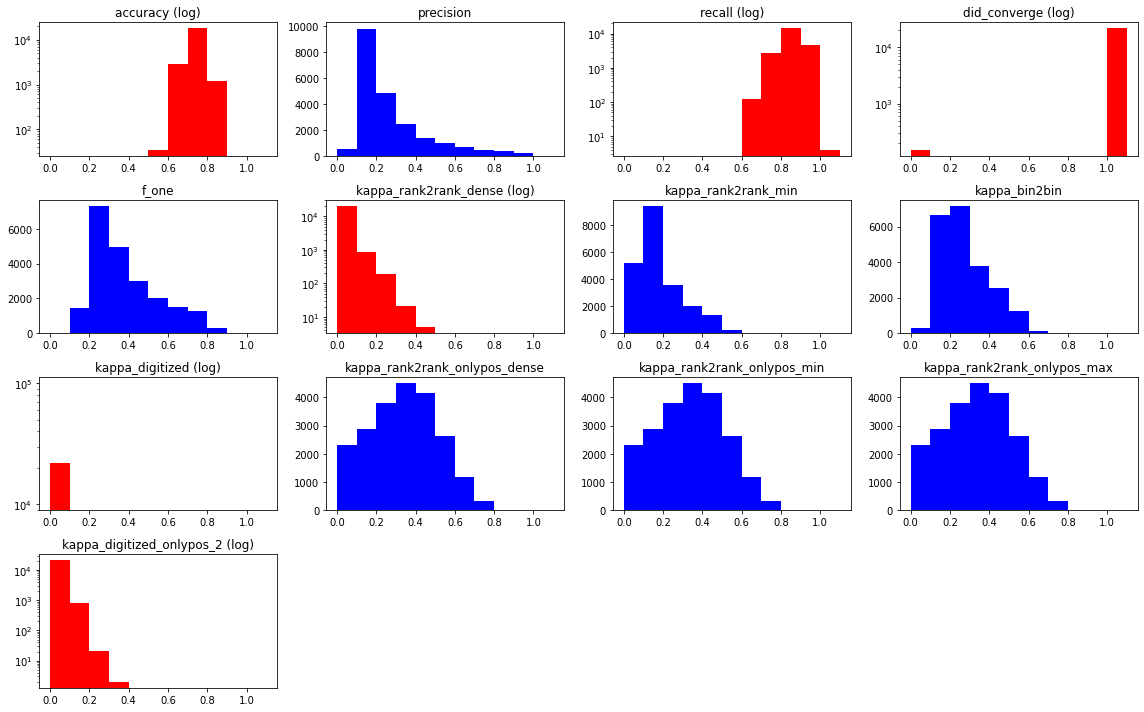

## quantification_measure: ppmi, embed_dimensions: 50, dcm_quant_measure: count

<span style="font-size:11pt">Settings: <span style="color: #009999">fc7b9c0605</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #0000ff">count</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">50</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

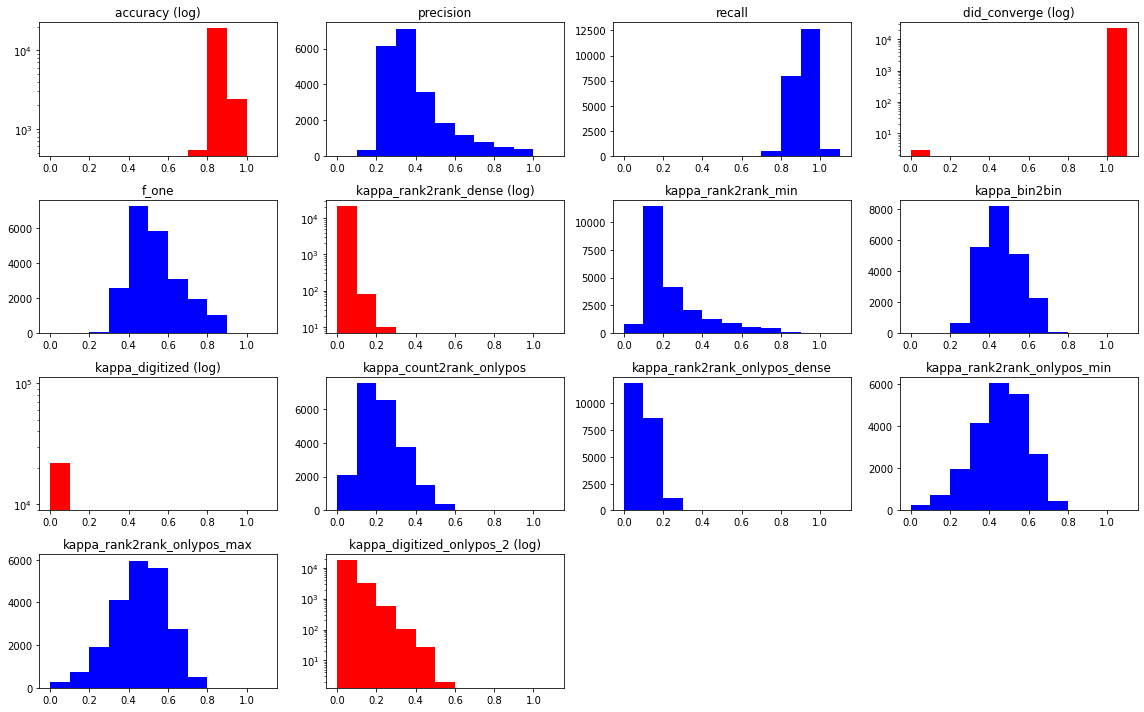

## quantification_measure: ppmi, embed_dimensions: 50, dcm_quant_measure: ppmi

<span style="font-size:11pt">Settings: <span style="color: #00ffff">84d60a303e</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">ppmi</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">50</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

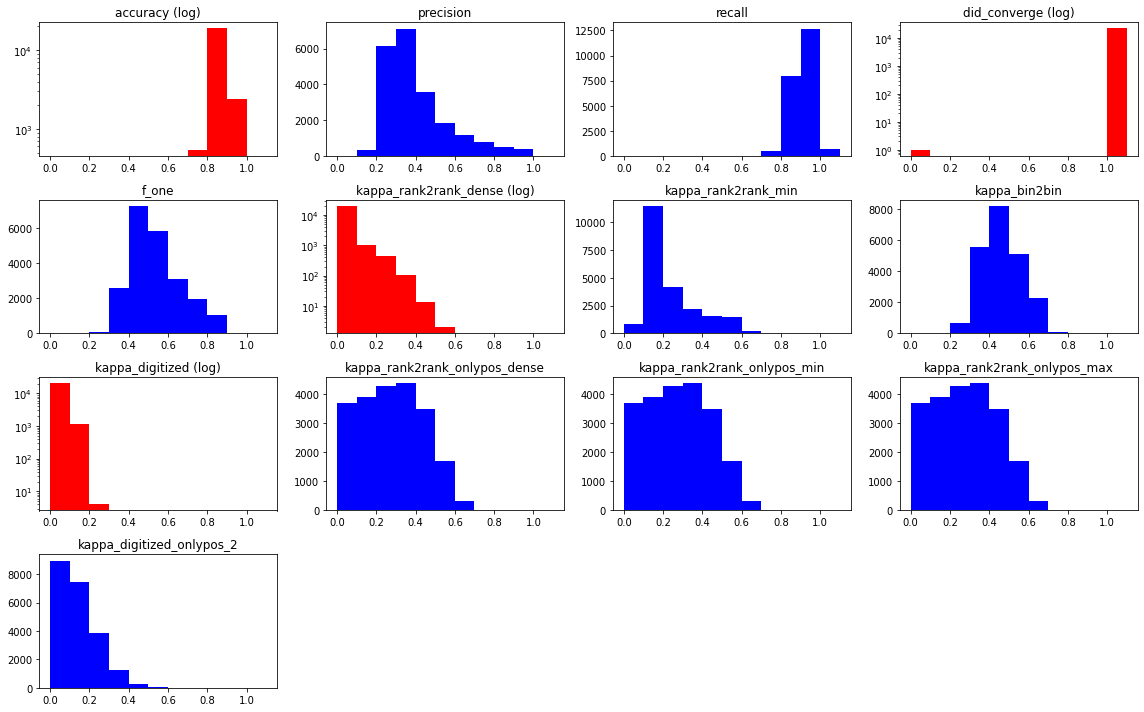

## quantification_measure: ppmi, embed_dimensions: 50, dcm_quant_measure: tfidf

<span style="font-size:11pt">Settings: <span style="color: #ffff00">1c3580d65d</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">tfidf</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">50</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

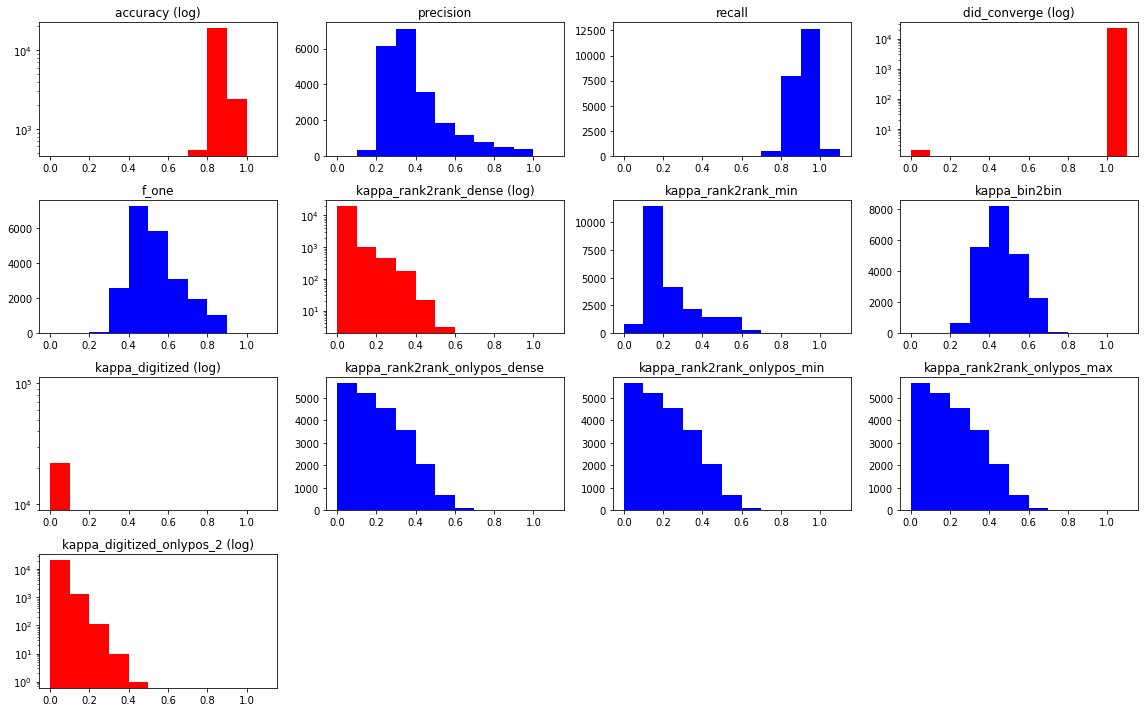

## quantification_measure: ppmi, embed_dimensions: 100, dcm_quant_measure: count

<span style="font-size:11pt">Settings: <span style="color: #ff0000">fcadb02655</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #0000ff">count</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #0000ff">100</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

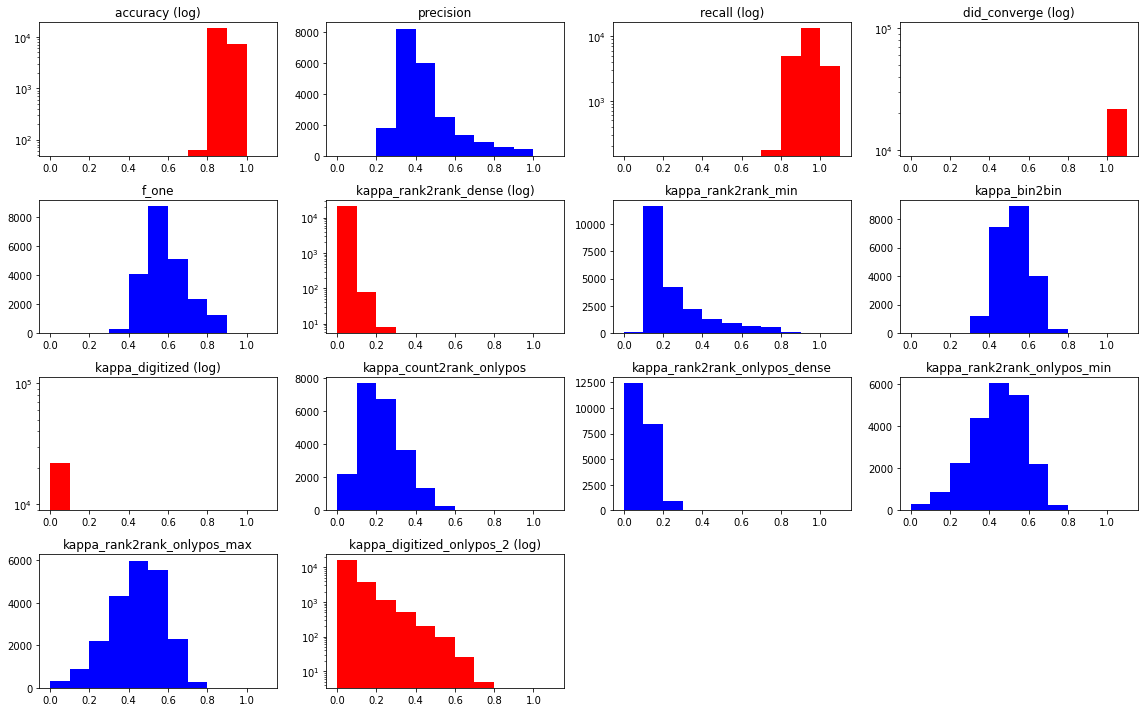

## quantification_measure: ppmi, embed_dimensions: 100, dcm_quant_measure: ppmi

<span style="font-size:11pt">Settings: <span style="color: #00ffff">fd13323e0f</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">ppmi</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #0000ff">100</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

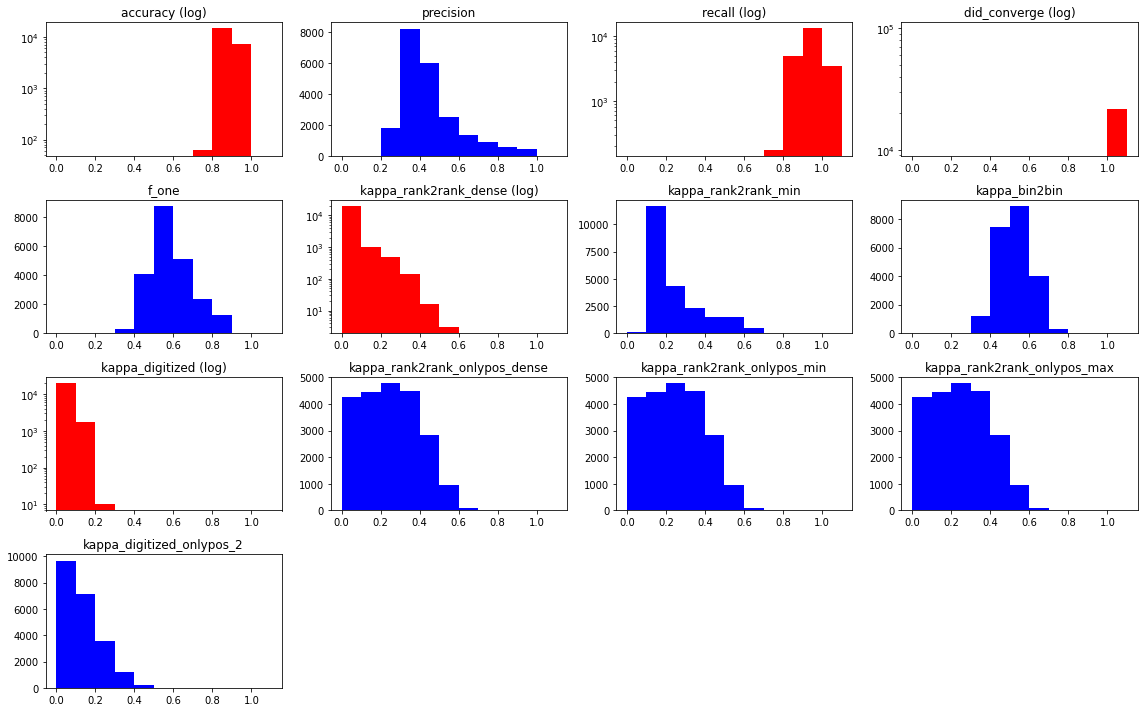

## quantification_measure: ppmi, embed_dimensions: 100, dcm_quant_measure: tfidf

<span style="font-size:11pt">Settings: <span style="color: #ff0000">0d34a86804</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">tfidf</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #0000ff">100</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

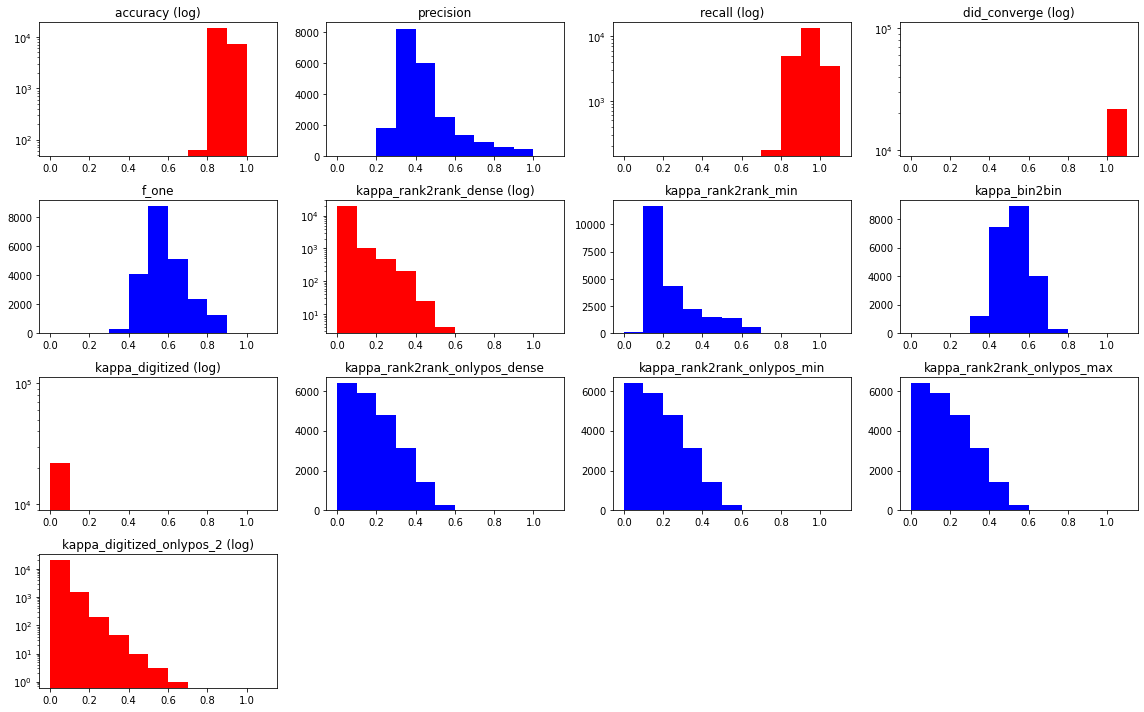

## quantification_measure: ppmi, embed_dimensions: 200, dcm_quant_measure: count

<span style="font-size:11pt">Settings: <span style="color: #ff0000">6f800bad16</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #0000ff">count</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">200</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

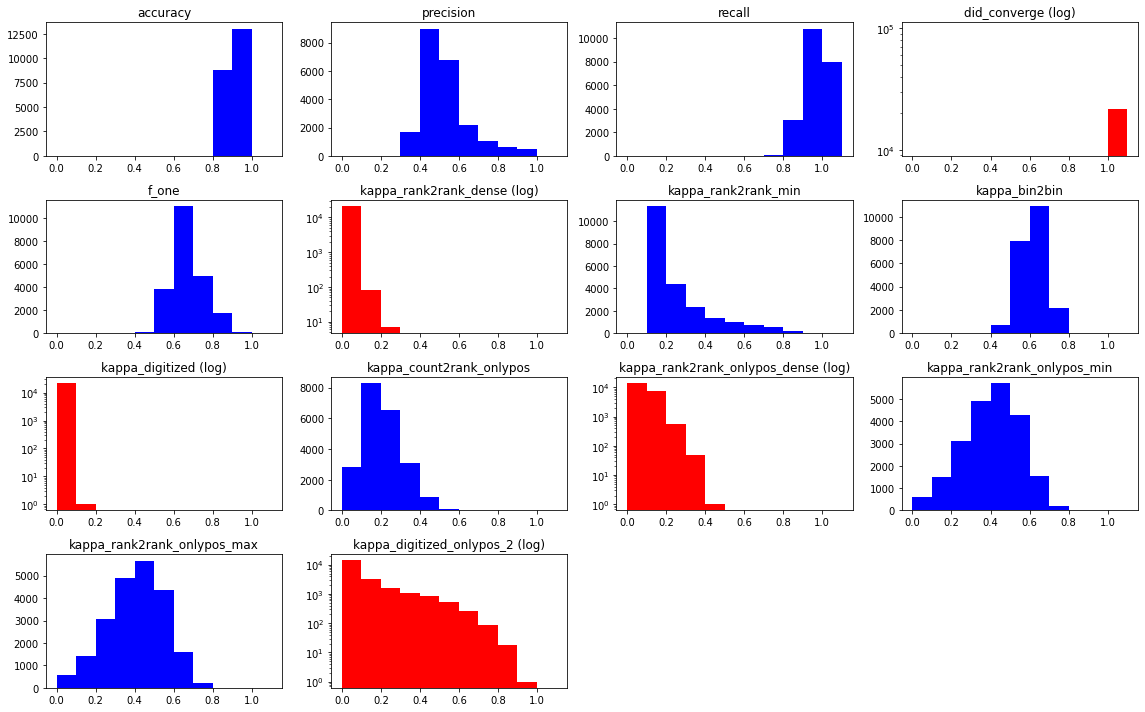

## quantification_measure: ppmi, embed_dimensions: 200, dcm_quant_measure: ppmi

<span style="font-size:11pt">Settings: <span style="color: #00ff00">e2c8e49a2f</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">ppmi</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">200</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

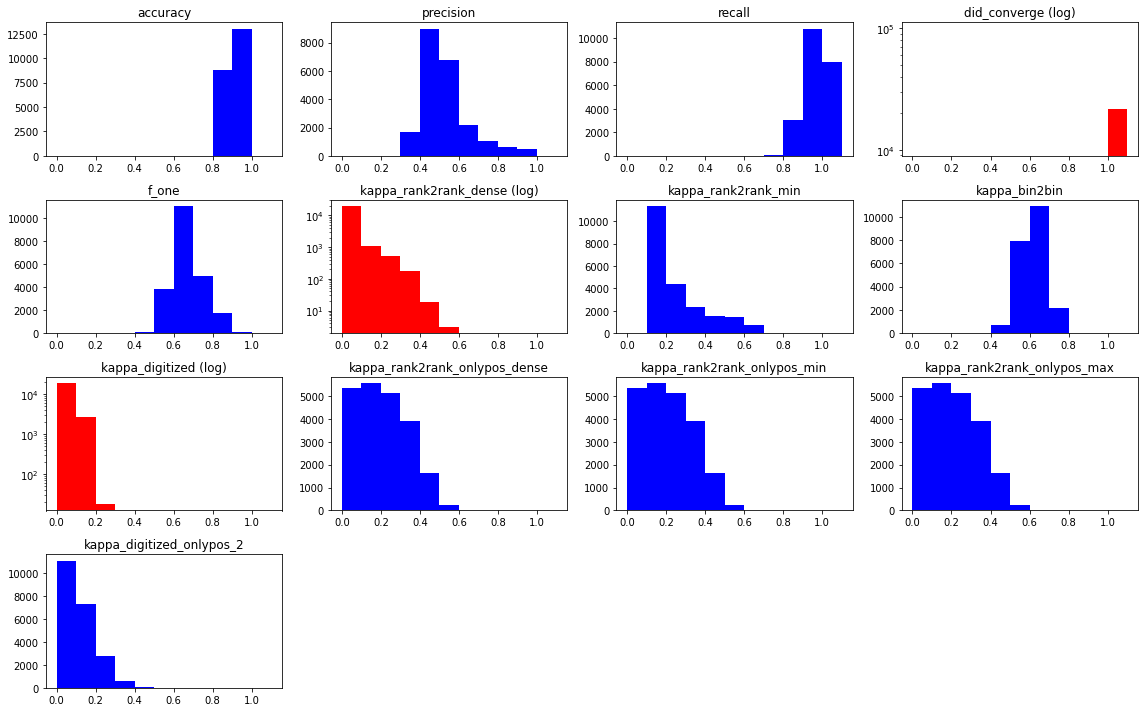

## quantification_measure: ppmi, embed_dimensions: 200, dcm_quant_measure: tfidf

<span style="font-size:11pt">Settings: <span style="color: #009999">b29c76cff7</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">tfidf</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">200</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

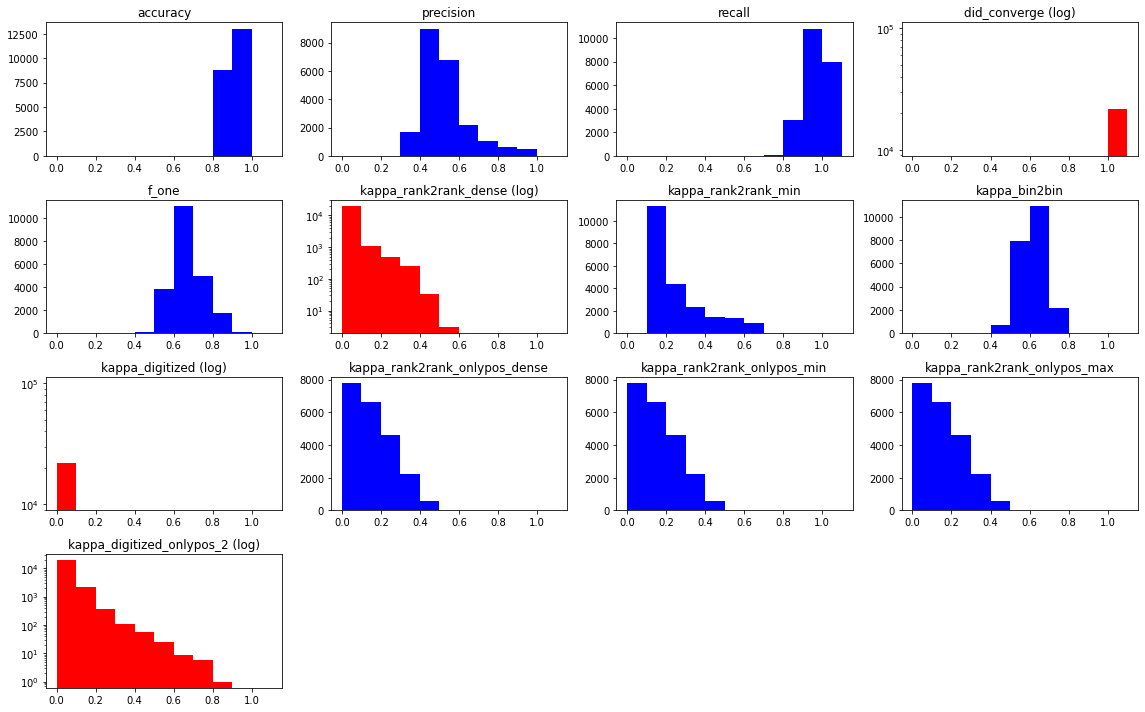

## quantification_measure: tfidf, embed_dimensions: 3, dcm_quant_measure: count

<span style="font-size:11pt">Settings: <span style="color: #ff0000">96092f8aac</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #0000ff">count</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">3</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

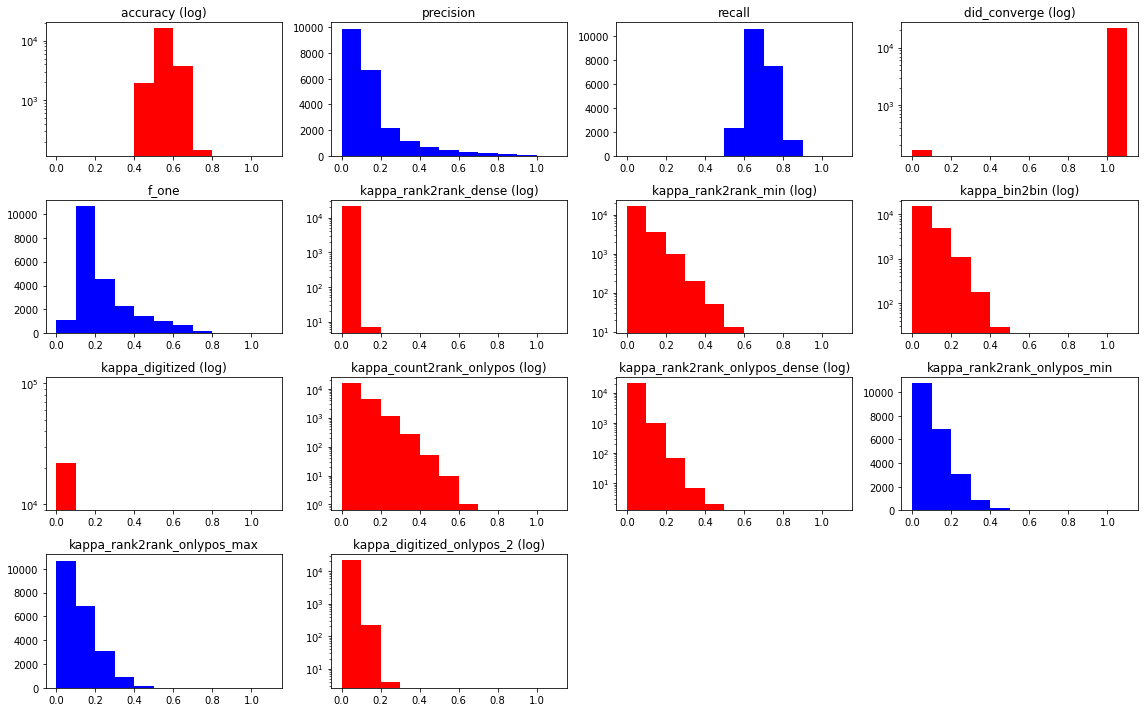

## quantification_measure: tfidf, embed_dimensions: 3, dcm_quant_measure: ppmi

<span style="font-size:11pt">Settings: <span style="color: #00ff00">e7da966cc3</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">ppmi</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">3</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

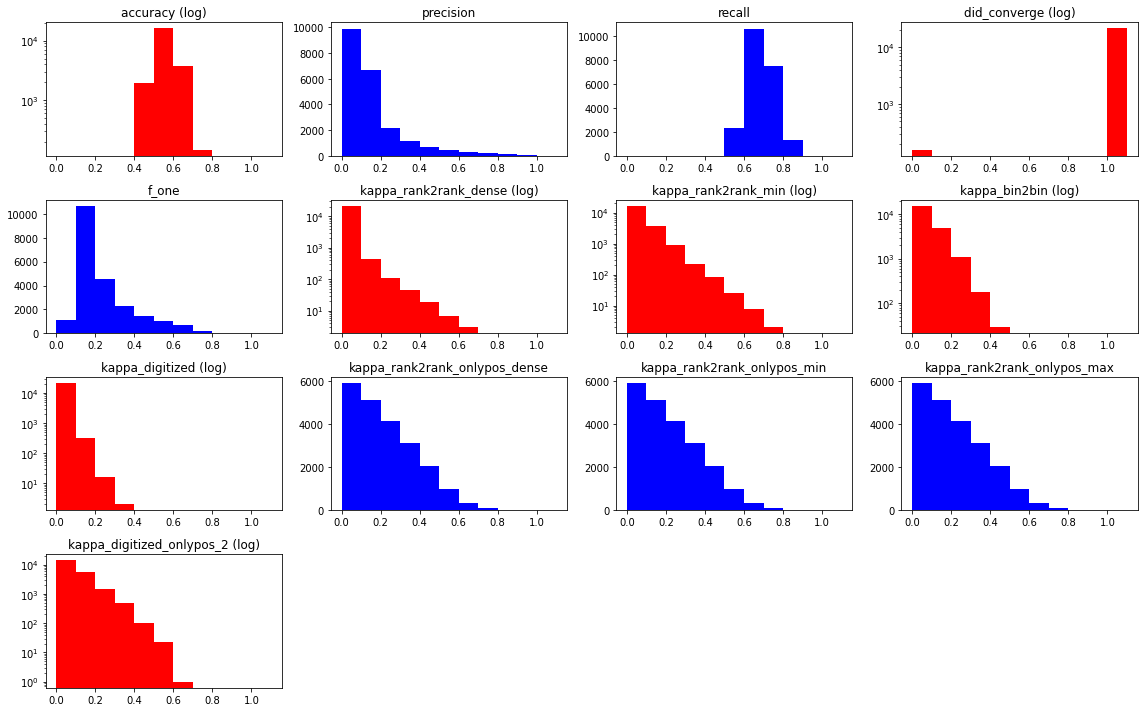

## quantification_measure: tfidf, embed_dimensions: 3, dcm_quant_measure: tfidf

<span style="font-size:11pt">Settings: <span style="color: #009999">4132c16ecb</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">tfidf</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">3</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

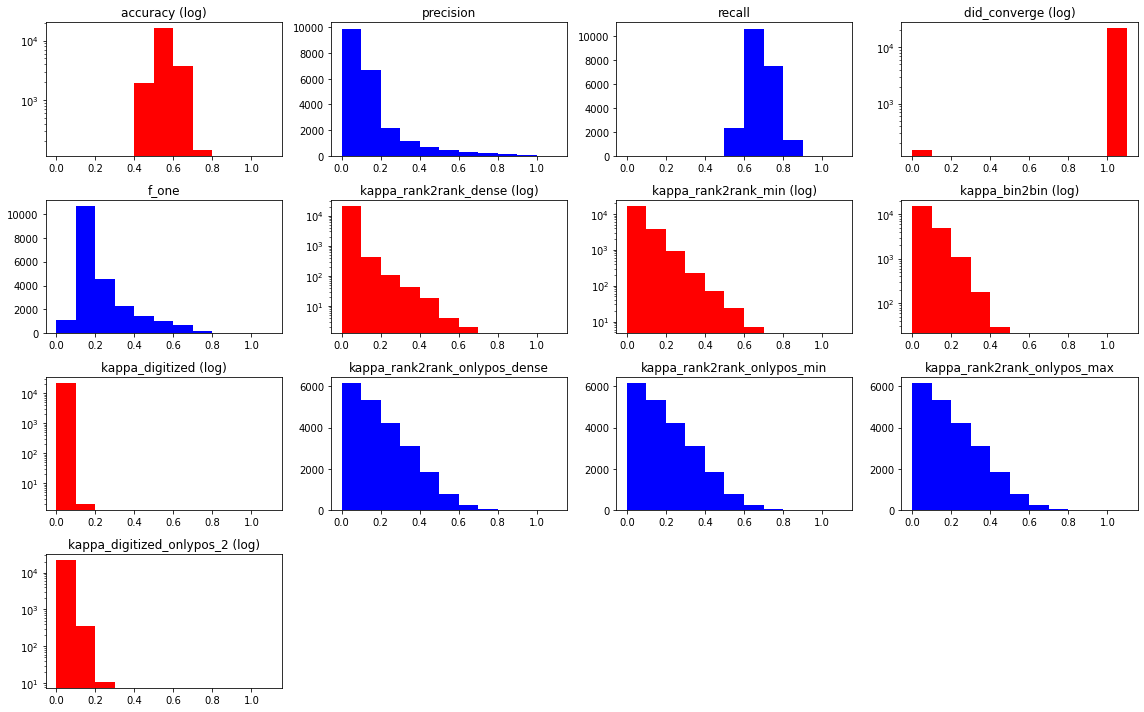

## quantification_measure: tfidf, embed_dimensions: 50, dcm_quant_measure: count

<span style="font-size:11pt">Settings: <span style="color: #0000ff">a92faed051</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #0000ff">count</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">50</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

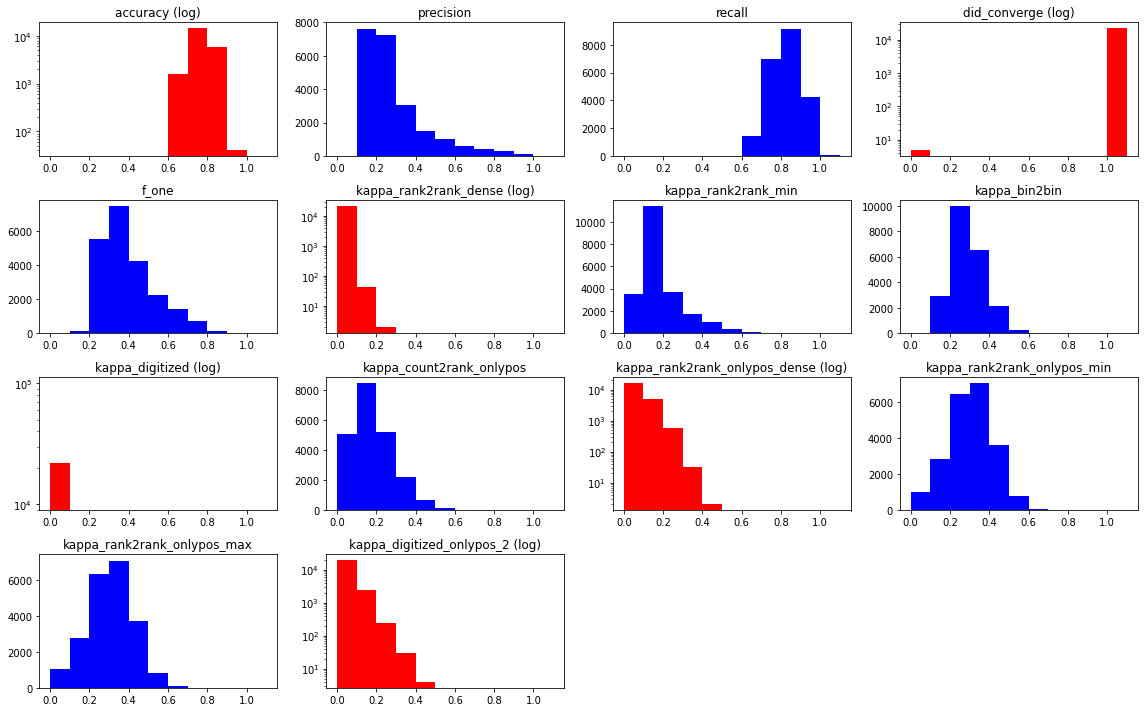

## quantification_measure: tfidf, embed_dimensions: 50, dcm_quant_measure: ppmi

<span style="font-size:11pt">Settings: <span style="color: #00ff00">4a9c29311e</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">ppmi</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">50</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

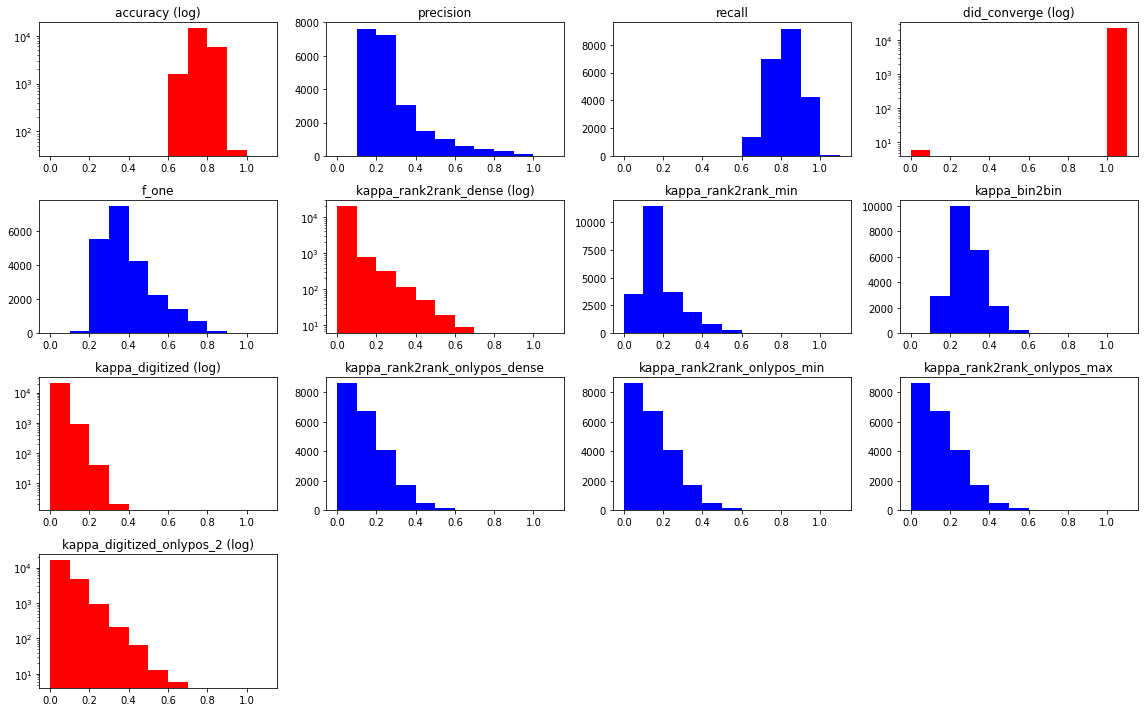

## quantification_measure: tfidf, embed_dimensions: 50, dcm_quant_measure: tfidf

<span style="font-size:11pt">Settings: <span style="color: #00ff00">66da8064f1</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">tfidf</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">50</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

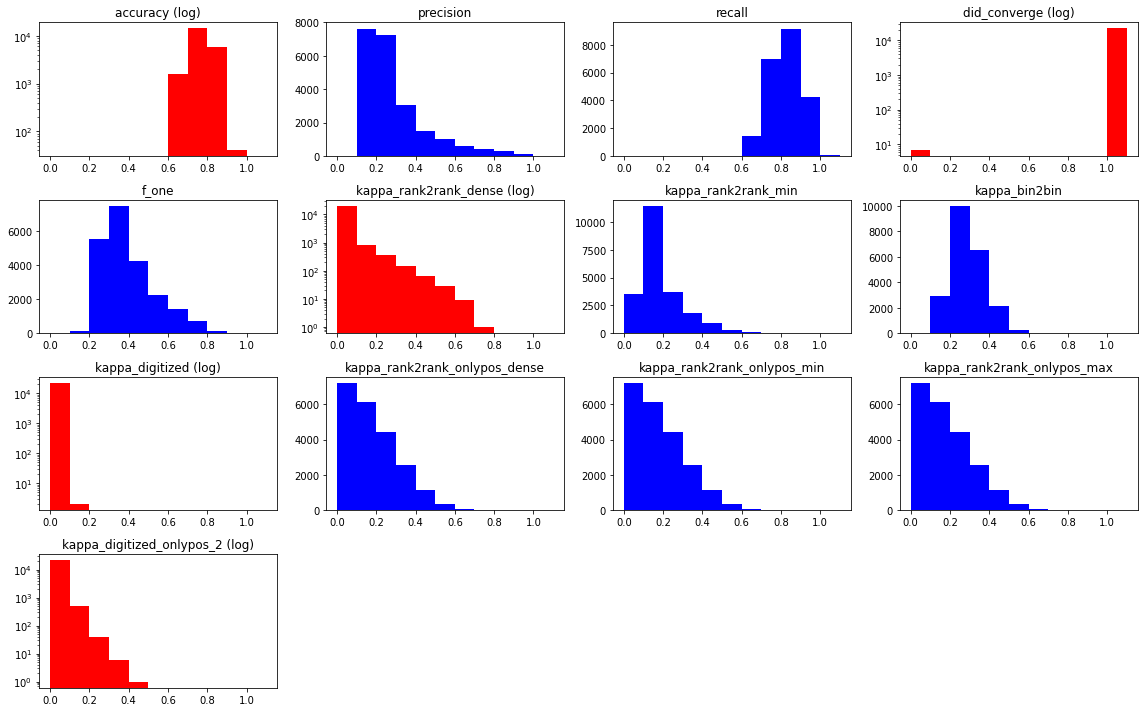

## quantification_measure: tfidf, embed_dimensions: 100, dcm_quant_measure: count

<span style="font-size:11pt">Settings: <span style="color: #0000ff">ab4372b6e4</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #0000ff">count</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #0000ff">100</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

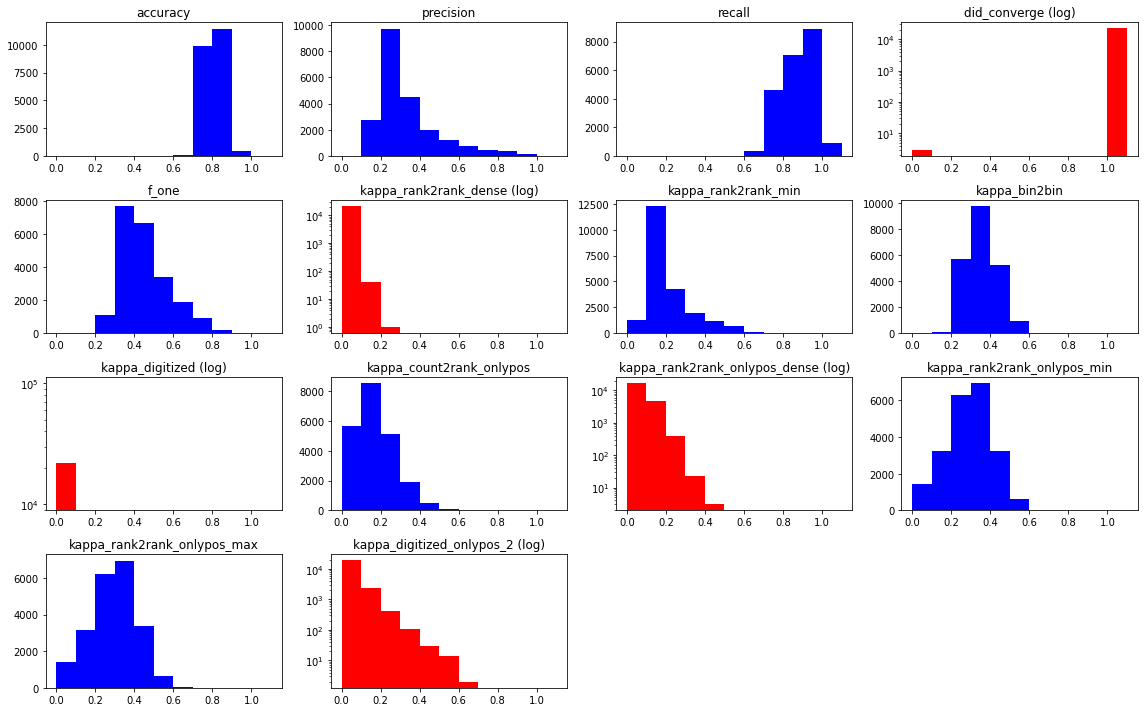

## quantification_measure: tfidf, embed_dimensions: 100, dcm_quant_measure: ppmi

<span style="font-size:11pt">Settings: <span style="color: #00ff00">5980559099</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">ppmi</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #0000ff">100</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

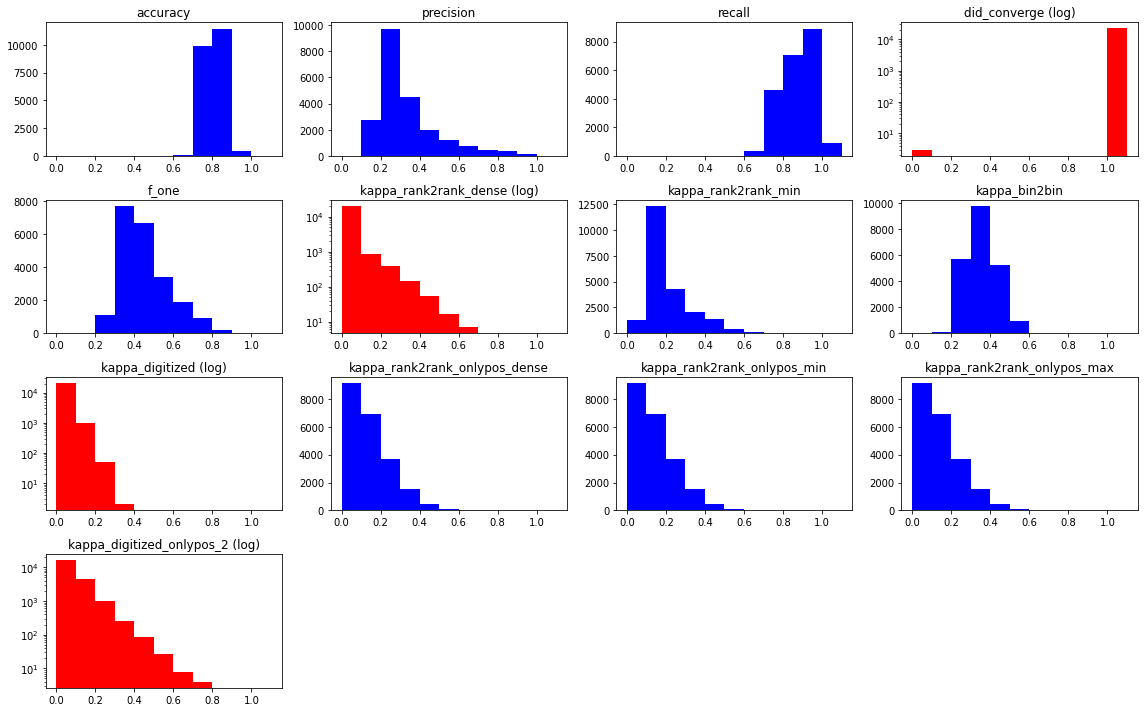

## quantification_measure: tfidf, embed_dimensions: 100, dcm_quant_measure: tfidf

<span style="font-size:11pt">Settings: <span style="color: #00ff00">3eb04431c8</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">tfidf</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #0000ff">100</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

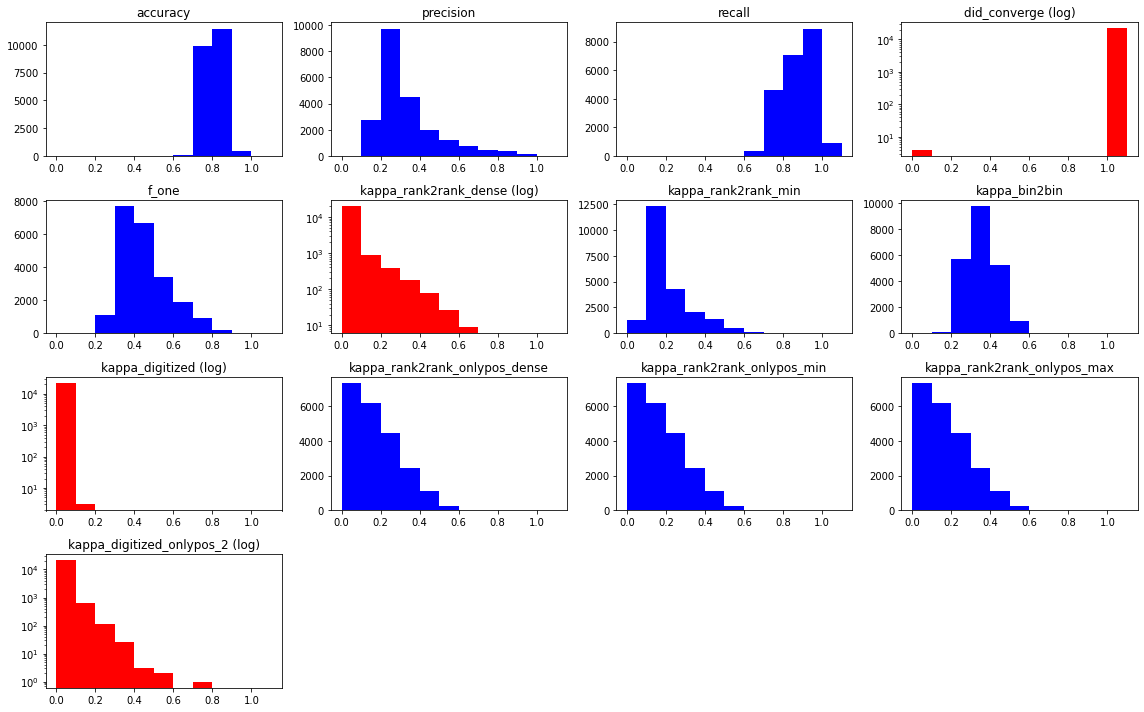

## quantification_measure: tfidf, embed_dimensions: 200, dcm_quant_measure: count

<span style="font-size:11pt">Settings: <span style="color: #ffff00">76365517b7</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #0000ff">count</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">200</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

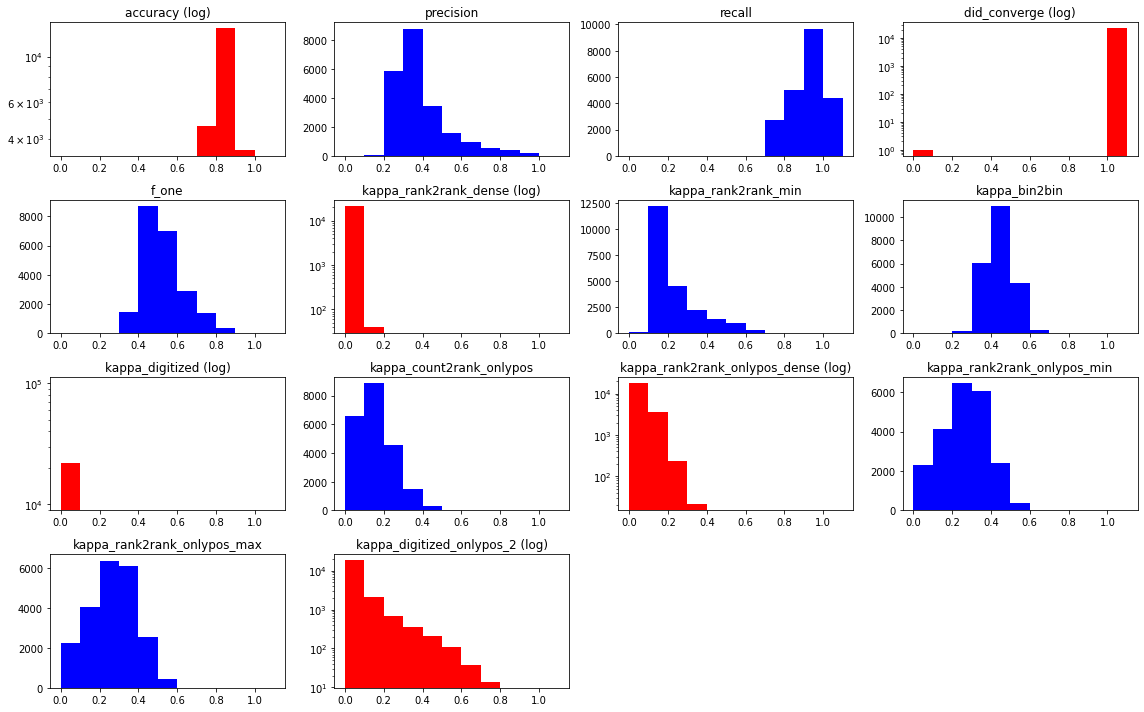

## quantification_measure: tfidf, embed_dimensions: 200, dcm_quant_measure: ppmi

<span style="font-size:11pt">Settings: <span style="color: #0000ff">0a453afc79</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">ppmi</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">200</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

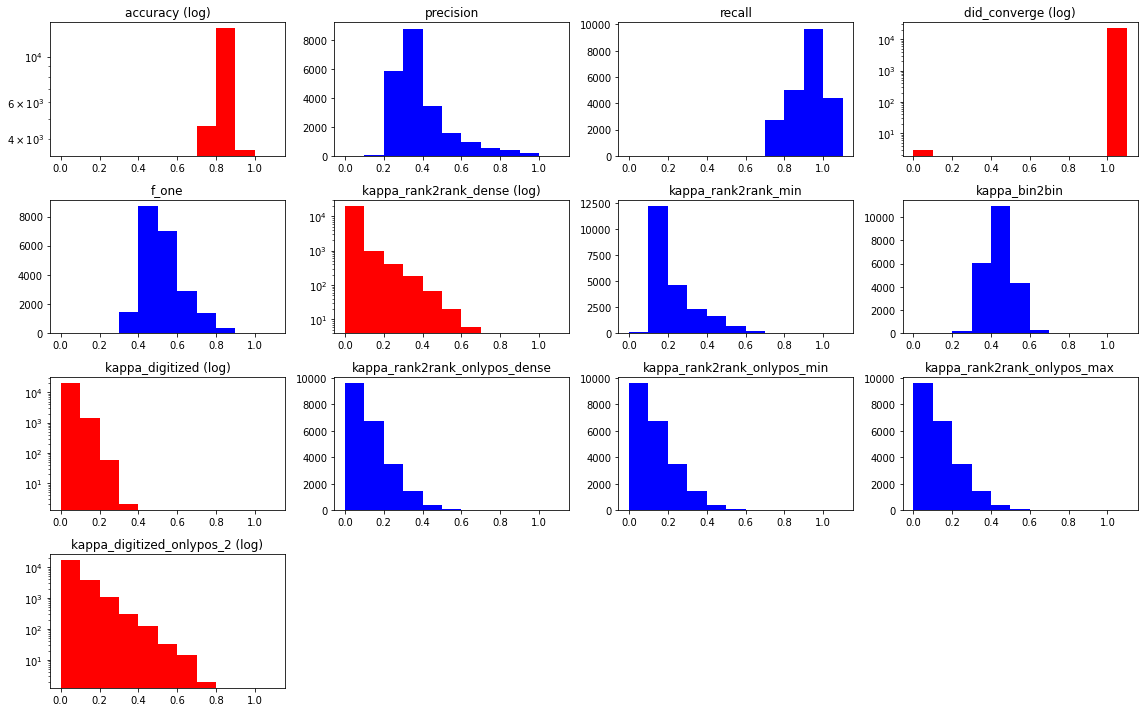

## quantification_measure: tfidf, embed_dimensions: 200, dcm_quant_measure: tfidf

<span style="font-size:11pt">Settings: <span style="color: #ffff00">0555ac7f15</span> - CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: <span style="color: #ff0000">placetypes</span>, DCM_QUANT_MEASURE: <span style="color: #ff0000">tfidf</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">200</span>, EXTRACTION_METHOD: <span style="color: #ff0000">all</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #ff0000">en</span>, MIN_WORDS_PER_DESC: <span style="color: #0000ff">50</span>, PP_COMPONENTS: <span style="color: #ff0000">none</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">tfidf</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

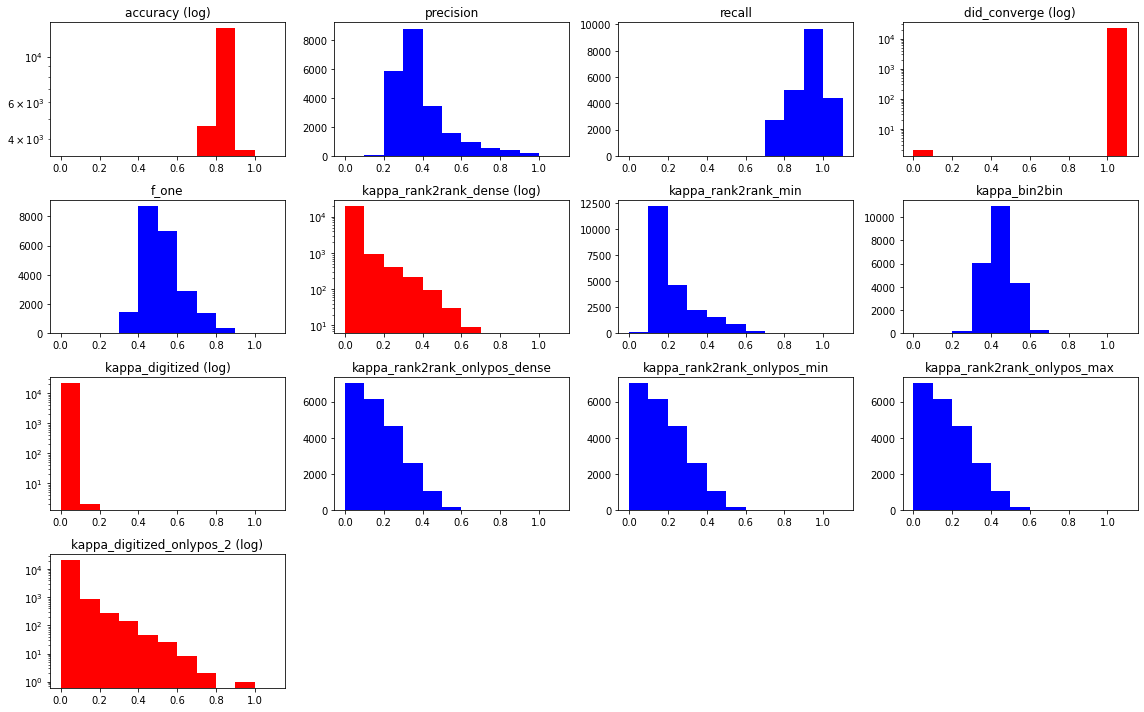

In [5]:
for conf, (important_settings, featureaxes) in zip(configs, featureaxes_list):
    specials = {k: v for k, v in conf.items() if isinstance(print_cnf[k], list)}
    display(Markdown("## "+", ".join(f"{k}: {v}" for k,v in specials.items())))
    display("Settings: "+(" - ".join(important_settings)))
    display_metrics(featureaxes["metrics"])

In [6]:
alls = {}
for conf, (important_settings, featureaxes) in zip(configs, featureaxes_list):
    specials = {k: v for k, v in conf.items() if isinstance(print_cnf[k], list)}
    display(Markdown("## "+", ".join(f"{k}: {v}" for k,v in specials.items())))
    #display("Settings:"+(": ".join(important_settings)))
    #show_lambda_elements(featureaxes["metrics"], 0.5, 0.1)
    lambda1, lambda2 = 0.5, 0.1
    metlist = featureaxes["metrics"]
    res = {}
    for met in list(list(metlist.values())[0].keys()):
        if "kappa" in met and not "bin2bin" in met:
            vals = [i[met] for i in metlist.values()]
            t1 = len([i for i in vals if i >= lambda1])
            t2 = len([i for i in vals if i >= lambda2]) - t1
            if t1:
                print(f" {met}: T^{lambda1}: {t1}, T^{lambda2}: {t2}, in T^{lambda1}: {', '.join([k for k, v in metlist.items() if v[met] > lambda1][:5])}")
            # res[met] = {lambda1: t1, lambda2: t2, f"{lambda1}_elems": [k for k, v in metlist.items() if v[met] > lambda1][:5]}
            res[shorten_met(met)] = t1
    # alls[" | ".join(f"{v}" for k,v in specials.items())] = res
    alls[tuple(specials.values())] = res

## quantification_measure: ppmi, embed_dimensions: 3, dcm_quant_measure: count

 kappa_rank2rank_min: T^0.5: 1204, T^0.1: 15464, in T^0.5: boats, school, rail, ciel, map
 kappa_count2rank_onlypos: T^0.5: 66, T^0.1: 16512, in T^0.5: vagues, kanaren, barocco, canmore, classicalrevival
 kappa_rank2rank_onlypos_min: T^0.5: 2448, T^0.1: 18188, in T^0.5: iwachow, blyth, laos, tarde, flickrclassique
 kappa_rank2rank_onlypos_max: T^0.5: 2527, T^0.1: 18116, in T^0.5: iwachow, blyth, laos, tarde, flickrclassique


## quantification_measure: ppmi, embed_dimensions: 3, dcm_quant_measure: ppmi

 kappa_rank2rank_min: T^0.5: 175, T^0.1: 16412, in T^0.5: fishing, 550d, d200, hike, mount


## quantification_measure: ppmi, embed_dimensions: 3, dcm_quant_measure: tfidf

 kappa_rank2rank_min: T^0.5: 224, T^0.1: 16383, in T^0.5: peaceful, overcast, deutschland, cloudy, steps


## quantification_measure: ppmi, embed_dimensions: 50, dcm_quant_measure: count

 kappa_rank2rank_min: T^0.5: 2113, T^0.1: 18914, in T^0.5: pittsburgh, cover, grain, boats, mystery
 kappa_count2rank_onlypos: T^0.5: 415, T^0.1: 19306, in T^0.5: blyth, munro, yatch, palme, vagues
 kappa_rank2rank_onlypos_min: T^0.5: 8691, T^0.1: 12872, in T^0.5: iwachow, sisters, blyth, sir, maisons
 kappa_rank2rank_onlypos_max: T^0.5: 8852, T^0.1: 12713, in T^0.5: iwachow, sisters, blyth, sir, maisons
 kappa_digitized_onlypos_2: T^0.5: 2, T^0.1: 4054, in T^0.5: minicooper, sibiu


## quantification_measure: ppmi, embed_dimensions: 50, dcm_quant_measure: ppmi

 kappa_rank2rank_dense: T^0.5: 2, T^0.1: 1598, in T^0.5: nature, landscape
 kappa_rank2rank_min: T^0.5: 1644, T^0.1: 19389, in T^0.5: year, dutch, holga, shot, dock
 kappa_rank2rank_onlypos_dense: T^0.5: 5, T^0.1: 890, in T^0.5: academics, 458, interstate10, a319, planespotting
 kappa_rank2rank_onlypos_min: T^0.5: 5, T^0.1: 890, in T^0.5: academics, 458, interstate10, a319, planespotting
 kappa_rank2rank_onlypos_max: T^0.5: 5, T^0.1: 890, in T^0.5: academics, 458, interstate10, a319, planespotting
 kappa_digitized_onlypos_2: T^0.5: 5, T^0.1: 572, in T^0.5: prawn, academics, 458, interstate10, lokomotive


## quantification_measure: ppmi, embed_dimensions: 50, dcm_quant_measure: tfidf

 kappa_rank2rank_dense: T^0.5: 3, T^0.1: 1661, in T^0.5: landscape, trees, nature
 kappa_rank2rank_min: T^0.5: 1735, T^0.1: 19300, in T^0.5: 2002, coast, blonde, canoneos7d, airport
 kappa_rank2rank_onlypos_dense: T^0.5: 7, T^0.1: 1789, in T^0.5: appetizer, interstate10, aerodrome, eggplant, planespotting
 kappa_rank2rank_onlypos_min: T^0.5: 7, T^0.1: 1789, in T^0.5: appetizer, interstate10, aerodrome, eggplant, planespotting
 kappa_rank2rank_onlypos_max: T^0.5: 7, T^0.1: 1789, in T^0.5: appetizer, interstate10, aerodrome, eggplant, planespotting


## quantification_measure: ppmi, embed_dimensions: 100, dcm_quant_measure: count

 kappa_rank2rank_min: T^0.5: 2256, T^0.1: 19444, in T^0.5: pittsburgh, grain, cover, boats, mystery
 kappa_count2rank_onlypos: T^0.5: 305, T^0.1: 19314, in T^0.5: egrets, palme, odonata, vagues, llovemypic
 kappa_rank2rank_onlypos_min: T^0.5: 7955, T^0.1: 13560, in T^0.5: sir, pittsburgh, grain, cover, observationdeck
 kappa_rank2rank_onlypos_max: T^0.5: 8138, T^0.1: 13383, in T^0.5: blyth, sir, pittsburgh, grain, cover
 kappa_digitized_onlypos_2: T^0.5: 128, T^0.1: 5755, in T^0.5: kenaipeninsula, canons3, theaters, llovemypic, ladefense


## quantification_measure: ppmi, embed_dimensions: 100, dcm_quant_measure: ppmi

 kappa_rank2rank_dense: T^0.5: 3, T^0.1: 1672, in T^0.5: nature, landscape, trees
 kappa_rank2rank_min: T^0.5: 1902, T^0.1: 19805, in T^0.5: year, dutch, floral, holga, shot
 kappa_rank2rank_onlypos_dense: T^0.5: 2, T^0.1: 962, in T^0.5: a319, planespotting
 kappa_rank2rank_onlypos_min: T^0.5: 2, T^0.1: 962, in T^0.5: a319, planespotting
 kappa_rank2rank_onlypos_max: T^0.5: 2, T^0.1: 962, in T^0.5: a319, planespotting
 kappa_digitized_onlypos_2: T^0.5: 4, T^0.1: 810, in T^0.5: gleis, a319, usairways, planespotting


## quantification_measure: ppmi, embed_dimensions: 100, dcm_quant_measure: tfidf

 kappa_rank2rank_dense: T^0.5: 4, T^0.1: 1734, in T^0.5: landscape, clouds, trees, nature
 kappa_rank2rank_min: T^0.5: 1956, T^0.1: 19751, in T^0.5: 2002, coast, blonde, canoneos7d, airport
 kappa_rank2rank_onlypos_dense: T^0.5: 3, T^0.1: 1951, in T^0.5: aerodrome, a319, planespotting
 kappa_rank2rank_onlypos_min: T^0.5: 3, T^0.1: 1951, in T^0.5: aerodrome, a319, planespotting
 kappa_rank2rank_onlypos_max: T^0.5: 3, T^0.1: 1951, in T^0.5: aerodrome, a319, planespotting
 kappa_digitized_onlypos_2: T^0.5: 4, T^0.1: 451, in T^0.5: locomotora, a319, planespotting, fencefriday


## quantification_measure: ppmi, embed_dimensions: 200, dcm_quant_measure: count

 kappa_rank2rank_min: T^0.5: 2452, T^0.1: 19381, in T^0.5: pittsburgh, cover, grain, edmonton, boats
 kappa_count2rank_onlypos: T^0.5: 138, T^0.1: 18821, in T^0.5: b747, palme, haleakala, porthcawl, s0ulsurfing
 kappa_rank2rank_onlypos_min: T^0.5: 6006, T^0.1: 15203, in T^0.5: gotik, sir, pittsburgh, cover, grain
 kappa_rank2rank_onlypos_max: T^0.5: 6170, T^0.1: 15040, in T^0.5: gotik, sir, pittsburgh, cover, grain
 kappa_digitized_onlypos_2: T^0.5: 887, T^0.1: 6819, in T^0.5: gotik, blyth, mirroring, flickrclassique, deleteme8


## quantification_measure: ppmi, embed_dimensions: 200, dcm_quant_measure: ppmi

 kappa_rank2rank_dense: T^0.5: 3, T^0.1: 1756, in T^0.5: nature, landscape, trees
 kappa_rank2rank_min: T^0.5: 2188, T^0.1: 19645, in T^0.5: year, floral, dutch, holga, shot
 kappa_rank2rank_onlypos_dense: T^0.5: 3, T^0.1: 1084, in T^0.5: a319, planespotting, canadair
 kappa_rank2rank_onlypos_min: T^0.5: 3, T^0.1: 1084, in T^0.5: a319, planespotting, canadair
 kappa_rank2rank_onlypos_max: T^0.5: 3, T^0.1: 1084, in T^0.5: a319, planespotting, canadair
 kappa_digitized_onlypos_2: T^0.5: 7, T^0.1: 1063, in T^0.5: skiresort, fusball, aerodrome, embraer, stockphotograph


## quantification_measure: ppmi, embed_dimensions: 200, dcm_quant_measure: tfidf

 kappa_rank2rank_dense: T^0.5: 3, T^0.1: 1817, in T^0.5: landscape, trees, nature
 kappa_rank2rank_min: T^0.5: 2237, T^0.1: 19596, in T^0.5: 2002, blurry, suburb, coast, blonde
 kappa_rank2rank_onlypos_dense: T^0.5: 4, T^0.1: 2195, in T^0.5: aerodrome, a319, canadair, planespotting
 kappa_rank2rank_onlypos_min: T^0.5: 4, T^0.1: 2195, in T^0.5: aerodrome, a319, canadair, planespotting
 kappa_rank2rank_onlypos_max: T^0.5: 4, T^0.1: 2195, in T^0.5: aerodrome, a319, canadair, planespotting
 kappa_digitized_onlypos_2: T^0.5: 42, T^0.1: 931, in T^0.5: altontowers, southrim, passengertrain, nycdot, hennepincountyminnesota


## quantification_measure: tfidf, embed_dimensions: 3, dcm_quant_measure: count

 kappa_rank2rank_min: T^0.5: 13, T^0.1: 4893, in T^0.5: scenic, hiking, trail, landscape, scenery
 kappa_count2rank_onlypos: T^0.5: 11, T^0.1: 5481, in T^0.5: armee, dulles, a319, aeroplanes, a320
 kappa_rank2rank_onlypos_min: T^0.5: 30, T^0.1: 9727, in T^0.5: armee, lufthansa, dulles, silesian, manta
 kappa_rank2rank_onlypos_max: T^0.5: 27, T^0.1: 9797, in T^0.5: armee, lufthansa, dulles, silesian, manta


## quantification_measure: tfidf, embed_dimensions: 3, dcm_quant_measure: ppmi

 kappa_rank2rank_dense: T^0.5: 10, T^0.1: 603, in T^0.5: tree, sunset, river, clouds, sun
 kappa_rank2rank_min: T^0.5: 36, T^0.1: 4930, in T^0.5: hike, countryside, tree, snow, mountains
 kappa_rank2rank_onlypos_dense: T^0.5: 1477, T^0.1: 12494, in T^0.5: macbook, afb, kirkko, hooverdam, prawn
 kappa_rank2rank_onlypos_min: T^0.5: 1477, T^0.1: 12494, in T^0.5: macbook, afb, kirkko, hooverdam, prawn
 kappa_rank2rank_onlypos_max: T^0.5: 1477, T^0.1: 12494, in T^0.5: macbook, afb, kirkko, hooverdam, prawn
 kappa_digitized_onlypos_2: T^0.5: 23, T^0.1: 6838, in T^0.5: comercio, happyhour, thamesriver, soy, oliveoil


## quantification_measure: tfidf, embed_dimensions: 3, dcm_quant_measure: tfidf

 kappa_rank2rank_dense: T^0.5: 6, T^0.1: 602, in T^0.5: landscape, river, clouds, trees, water
 kappa_rank2rank_min: T^0.5: 31, T^0.1: 4946, in T^0.5: outdoors, tree, landscape, river, mist
 kappa_rank2rank_onlypos_dense: T^0.5: 1162, T^0.1: 12598, in T^0.5: glaze, cleavage, cigarettes, supermarket, potato
 kappa_rank2rank_onlypos_min: T^0.5: 1162, T^0.1: 12598, in T^0.5: glaze, cleavage, cigarettes, supermarket, potato
 kappa_rank2rank_onlypos_max: T^0.5: 1162, T^0.1: 12598, in T^0.5: glaze, cleavage, cigarettes, supermarket, potato


## quantification_measure: tfidf, embed_dimensions: 50, dcm_quant_measure: count

 kappa_rank2rank_min: T^0.5: 486, T^0.1: 17821, in T^0.5: boats, school, rail, waterfront, anawesomeshot
 kappa_count2rank_onlypos: T^0.5: 144, T^0.1: 16571, in T^0.5: yatch, porthcawl, meetingresort, bookshelf, s0ulsurfing
 kappa_rank2rank_onlypos_min: T^0.5: 869, T^0.1: 19878, in T^0.5: blyth, egrets, railtrail, boats, biplane
 kappa_rank2rank_onlypos_max: T^0.5: 925, T^0.1: 19839, in T^0.5: blyth, egrets, railtrail, boats, biplane


## quantification_measure: tfidf, embed_dimensions: 50, dcm_quant_measure: ppmi

 kappa_rank2rank_dense: T^0.5: 28, T^0.1: 1295, in T^0.5: reflection, tree, view, snow, sunset
 kappa_rank2rank_min: T^0.5: 335, T^0.1: 17976, in T^0.5: dock, pier, downtown, reflection, fishing
 kappa_rank2rank_onlypos_dense: T^0.5: 180, T^0.1: 7575, in T^0.5: glacier, norfolksouthern, shopwindow, narita, eatery
 kappa_rank2rank_onlypos_min: T^0.5: 180, T^0.1: 7575, in T^0.5: glacier, norfolksouthern, shopwindow, narita, eatery
 kappa_rank2rank_onlypos_max: T^0.5: 180, T^0.1: 7575, in T^0.5: glacier, norfolksouthern, shopwindow, narita, eatery
 kappa_digitized_onlypos_2: T^0.5: 19, T^0.1: 3404, in T^0.5: appetizer, locomotora, foodie, academics, unitedairlines


## quantification_measure: tfidf, embed_dimensions: 50, dcm_quant_measure: tfidf

 kappa_rank2rank_dense: T^0.5: 39, T^0.1: 1393, in T^0.5: reflection, window, outdoors, autumn, building
 kappa_rank2rank_min: T^0.5: 410, T^0.1: 17904, in T^0.5: coast, peaceful, waterfront, overcast, bird
 kappa_rank2rank_onlypos_dense: T^0.5: 419, T^0.1: 11746, in T^0.5: beverages, coast, peaceful, bird, cloudy
 kappa_rank2rank_onlypos_min: T^0.5: 419, T^0.1: 11746, in T^0.5: beverages, coast, peaceful, bird, cloudy
 kappa_rank2rank_onlypos_max: T^0.5: 419, T^0.1: 11746, in T^0.5: beverages, coast, peaceful, bird, cloudy


## quantification_measure: tfidf, embed_dimensions: 100, dcm_quant_measure: count

 kappa_rank2rank_min: T^0.5: 810, T^0.1: 19719, in T^0.5: grain, boats, danger, school, rail
 kappa_count2rank_onlypos: T^0.5: 92, T^0.1: 16050, in T^0.5: b747, yatch, airways, porthcawl, s0ulsurfing
 kappa_rank2rank_onlypos_min: T^0.5: 677, T^0.1: 19650, in T^0.5: egrets, boats, specnature, kirche, imposing
 kappa_rank2rank_onlypos_max: T^0.5: 714, T^0.1: 19660, in T^0.5: egrets, boats, specnature, kirche, imposing
 kappa_digitized_onlypos_2: T^0.5: 16, T^0.1: 2838, in T^0.5: llovemypic, porthcawl, lifebuoy, primordial, pali


## quantification_measure: tfidf, embed_dimensions: 100, dcm_quant_measure: ppmi

 kappa_rank2rank_dense: T^0.5: 24, T^0.1: 1434, in T^0.5: tree, view, snow, sunset, river
 kappa_rank2rank_min: T^0.5: 496, T^0.1: 20056, in T^0.5: dock, pier, lawn, downtown, reflection
 kappa_rank2rank_onlypos_dense: T^0.5: 144, T^0.1: 8362, in T^0.5: narita, eatery, baked, coastline, retail
 kappa_rank2rank_onlypos_min: T^0.5: 144, T^0.1: 8362, in T^0.5: narita, eatery, baked, coastline, retail
 kappa_rank2rank_onlypos_max: T^0.5: 144, T^0.1: 8362, in T^0.5: narita, eatery, baked, coastline, retail
 kappa_digitized_onlypos_2: T^0.5: 39, T^0.1: 3994, in T^0.5: narita, appetizer, locomotora, battlements, illness


## quantification_measure: tfidf, embed_dimensions: 100, dcm_quant_measure: tfidf

 kappa_rank2rank_dense: T^0.5: 35, T^0.1: 1523, in T^0.5: reflection, window, autumn, building, travel
 kappa_rank2rank_min: T^0.5: 609, T^0.1: 19945, in T^0.5: coast, airport, peaceful, waterfront, overcast
 kappa_rank2rank_onlypos_dense: T^0.5: 318, T^0.1: 12226, in T^0.5: peaceful, alumni, windowdisplay, boats, ruraldecay
 kappa_rank2rank_onlypos_min: T^0.5: 318, T^0.1: 12226, in T^0.5: peaceful, alumni, windowdisplay, boats, ruraldecay
 kappa_rank2rank_onlypos_max: T^0.5: 318, T^0.1: 12226, in T^0.5: peaceful, alumni, windowdisplay, boats, ruraldecay
 kappa_digitized_onlypos_2: T^0.5: 3, T^0.1: 724, in T^0.5: passengertrain, planespotting, fencefriday


## quantification_measure: tfidf, embed_dimensions: 200, dcm_quant_measure: count

 kappa_rank2rank_min: T^0.5: 1248, T^0.1: 20422, in T^0.5: grain, boats, danger, school, rail
 kappa_count2rank_onlypos: T^0.5: 50, T^0.1: 15162, in T^0.5: b747, s0ulsurfing, yachting, molo, destroyer
 kappa_rank2rank_onlypos_min: T^0.5: 420, T^0.1: 18945, in T^0.5: boats, specnature, kirche, b747, sacred
 kappa_rank2rank_onlypos_max: T^0.5: 459, T^0.1: 18965, in T^0.5: boats, specnature, kirche, sacred, llovemypic
 kappa_digitized_onlypos_2: T^0.5: 163, T^0.1: 3306, in T^0.5: flowersplants, llovemypic, cherrytree, chmury, porthcawl


## quantification_measure: tfidf, embed_dimensions: 200, dcm_quant_measure: ppmi

 kappa_rank2rank_dense: T^0.5: 26, T^0.1: 1606, in T^0.5: tree, view, snow, sunset, river
 kappa_rank2rank_min: T^0.5: 920, T^0.1: 20762, in T^0.5: holga, dock, pier, lawn, drink
 kappa_rank2rank_onlypos_dense: T^0.5: 104, T^0.1: 9603, in T^0.5: eatery, baked, chorus, coastline, retail
 kappa_rank2rank_onlypos_min: T^0.5: 104, T^0.1: 9603, in T^0.5: eatery, baked, chorus, coastline, retail
 kappa_rank2rank_onlypos_max: T^0.5: 104, T^0.1: 9603, in T^0.5: eatery, baked, chorus, coastline, retail
 kappa_digitized_onlypos_2: T^0.5: 50, T^0.1: 4516, in T^0.5: norfolksouthern, gleis, locomotora, i95, classicalrevival


## quantification_measure: tfidf, embed_dimensions: 200, dcm_quant_measure: tfidf

 kappa_rank2rank_dense: T^0.5: 39, T^0.1: 1674, in T^0.5: reflection, window, outdoors, autumn, building
 kappa_rank2rank_min: T^0.5: 1093, T^0.1: 20589, in T^0.5: coast, blonde, airport, peaceful, waterfront
 kappa_rank2rank_onlypos_dense: T^0.5: 247, T^0.1: 13449, in T^0.5: peaceful, windowdisplay, boats, ruraldecay, nd110
 kappa_rank2rank_onlypos_min: T^0.5: 247, T^0.1: 13449, in T^0.5: peaceful, windowdisplay, boats, ruraldecay, nd110
 kappa_rank2rank_onlypos_max: T^0.5: 247, T^0.1: 13449, in T^0.5: peaceful, windowdisplay, boats, ruraldecay, nd110
 kappa_digitized_onlypos_2: T^0.5: 37, T^0.1: 1191, in T^0.5: beers, urinal, lakemead, lokomotive, 401


# Show complete Table with the Number of values in Kappa^0.5

In [7]:
styles = [{'selector': 'th', 'props': [('vertical-align','top')]}]  #('border-style', 'solid')  #see https://stackoverflow.com/a/55904239/5122790
styler = lambda df: df.style.apply(highlight_nonzero_max, axis=0).format(precision=0).set_table_styles(styles)

df = pd.DataFrame(alls, columns=pd.MultiIndex.from_tuples(alls.keys(), names=list(specials.keys()))).T
df["mean"] = df.mean(axis=1)
pyperclip.copy(df_to_latex(df, styler))
styler(df)

### Take-Aways from this huge table:
* assuming I want >= 400 directions, I must choose quadratic kappa-weights over linear ones.
* dcm_quant_measure == count is very good for digitized kappa, but consistently a lot worse than tf-idf and ppmi for ranking-based (which makes sense assuming there are many count==1 cases)
* I should go for 3 dimensions only sporadically, but for dcm_quant_measure in [tf-idf, ppmi] it's performance is actually consistently competative (huge surprise!!)

In [8]:
# dict(zip(specials.keys(), list(alls.keys())[0]))
less = {k: v for k, v in alls.items() if not (k[2] == "3" and k[3] not in ["tfidf", "ppmi"])}  #k[-1] == "quadratic"
less = {tuple(i for i in k): v for k, v in less.items()}  #k[:-1]
keys = list(specials.keys()) #[:-1]

df = pd.DataFrame(less, columns=pd.MultiIndex.from_tuples(less.keys(), names=keys)).T
df["mean"] = df.mean(axis=1)
pyperclip.copy(df_to_latex(df, styler))
styler(df)

### More analysis:
* quantification_measure == tfidf, n_dims = 200 produces aaaall the best results
* can't really say that results are better if quantification_measure and dcm_quant_measure are the same vs one tf-idf one ppmi

# Getting the Parameter-Kombi that yields the most candidates on average

In [9]:
METRIC = "mean"

df = pd.DataFrame(alls, columns=pd.MultiIndex.from_tuples(alls.keys(), names=list(specials.keys()))).T
df["mean"] = df.mean(axis=1)
best_config = dict(zip(df.index.names, df.idxmax()[METRIC]))
best_config.update({k: v for k, v in print_cnf.items() if not isinstance(v, list)})

print(f"MA_CLASSIFIER_SUCCMETRIC={shorten_met(df.loc[best_ind.values[0]].idxmax(), reverse=True)}", end=";")
print_envvars(get_filename(best_config, get_dependencies=False, doprint=False))                                                                         

NameError: name 'best_ind' is not defined